# Exploratory Data Analysis (EDA)

## Structure of the Dataset:

**ASSETID**: A unique identifier for each property or asset in the dataset. It's a categorical variable with multiple levels.  
**PERIOD**: The time period in which the data was recorded, typically represented as a six-digit integer (YYYYMM) indicating the year and month.  
**PRICE**: The total price of the property in the local currency (€). This is a numerical value.  
**UNITPRICE**: The price per unit area (square meter) of the property. This is also a numerical value.  
**CONSTRUCTEDAREA**: The total constructed area of the property in square meters. It's an integer value indicating the size of the property.  
**ROOMNUMBER**: The number of rooms in the property. This integer value includes all types of rooms (e.g., bedrooms, living rooms).  
**BATHNUMBER**: The number of bathrooms in the property. This is an integer value.  
**HASTERRACE**: A binary indicator (0/1) where 1 indicates the property has a terrace and 0 indicates it does not.  
**HASLIFT**: A binary indicator (0/1) where 1 indicates the property has a lift (elevator) and 0 indicates it does not.  
**HASAIRCONDITIONING**: A binary indicator (0/1) where 1 indicates the property has air conditioning and 0 indicates it does not.  
**AMENITYID**: An integer that likely represents a category or type of amenities associated with the property.  
**HASPARKINGSPACE**: A binary indicator (0/1) where 1 indicates the property includes a parking space and 0 indicates it does not.  
**ISPARKINGSPACEINCLUDEDINPRICE**: A binary indicator (0/1) where 1 indicates the parking space is included in the property price, and 0 indicates it is not.  
**PARKINGSPACEPRICE**: An integer that appears to be a placeholder or a standardized value (likely 1 in this dataset).  
**HASNORTHORIENTATION**: A binary indicator (0/1) where 1 indicates the property has a northern orientation and 0 indicates it does not.  
**HASSOUTHORIENTATION**: A binary indicator (0/1) where 1 indicates the property has a southern orientation and 0 indicates it does not.  
**HASEASTORIENTATION**: A binary indicator (0/1) where 1 indicates the property has an eastern orientation and 0 indicates it does not.  
**HASWESTORIENTATION**: A binary indicator (0/1) where 1 indicates the property has a western orientation and 0 indicates it does not.  
**HASBOXROOM**: A binary indicator (0/1) where 1 indicates the property includes a box room and 0 indicates it does not.  
**HASWARDROBE**: A binary indicator (0/1) where 1 indicates the property includes a built-in wardrobe, and 0 indicates it does not.  
**HASSWIMMINGPOOL**: A binary indicator (0/1) where 1 indicates the property includes a swimming pool, and 0 indicates it does not.  
**HASDOORMAN**: A binary indicator (0/1) where 1 indicates the property has a doorman or concierge service, and 0 indicates it does not.  
**HASGARDEN**: A binary indicator (0/1) where 1 indicates the property has a garden, and 0 indicates it does not.  
**ISDUPLEX**: A binary indicator (0/1) where 1 indicates the property is a duplex, and 0 indicates it is not.  
**ISSTUDIO**: A binary indicator (0/1) where 1 indicates the property is a studio, and 0 indicates it is not.  
**ISINTOPFLOOR**: A binary indicator (0/1) where 1 indicates the property is located on the top floor, and 0 indicates it is not.  
**CONSTRUCTIONYEAR**: The year the property was constructed. This is an integer value.  
**FLOORCLEAN**: An integer likely representing the floor level of the property.  
**FLATLOCATIONID**: An integer that likely corresponds to a specific location or region code for the flat.  
**CADCONSTRUCTIONYEAR**: The construction year of the property according to cadastral records.  
**CADMAXBUILDINGFLOOR**: The maximum number of floors in the building according to cadastral records.  
**CADDWELLINGCOUNT**: The number of dwelling units in the building according to cadastral records.  
**CADASTRALQUALITYID**: An integer representing the cadastral quality or classification of the building.  
**BUILTTYPEID_1**: A binary indicator (0/1) where 1 indicates the property is new construction.  
**BUILTTYPEID_2**: A binary indicator (0/1) where 1 indicates the property is second hand to be restored.  
**BUILTTYPEID_3**: A binary indicator (0/1) where 1 indicates the property is second hand in good condition.  
**DISTANCE_TO_CITY_CENTER**: A numerical value representing the distance (km) from the property to the city center.  
**DISTANCE_TO_METRO**: A numerical value representing the distance (km) from the property to the nearest metro station.  
**DISTANCE_TO_{main avenue}**: A numerical value representing the distance (km) from the property to the main avenue of each city.  
**LONGITUDE**: The geographical longitude of the property’s location.  
**LATITUDE**: The geographical latitude of the property’s location.  


### Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install folium
import folium
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

### Loading the Dataset

In [35]:
data = pd.read_csv("C:\\Users\\marin\\Documents\\TFM\\2.csv")
data.sample(5)

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
68349,A823926436871395981,201812,698000.0,5057.971014,138,3,2,0,1,0,...,25,5.0,0,0,1,2.225093,0.243597,2.239299,-3.717011,40.433860
34619,A1766421065297057886,201803,144000.0,4000.000000,36,1,1,0,0,1,...,17,5.0,0,0,1,0.963766,0.116985,0.558029,-3.699536,40.408561
37141,A10008595080626698929,201812,427000.0,4447.916667,96,2,1,0,1,1,...,15,4.0,0,0,1,0.713614,0.121138,1.409749,-3.709393,40.421375
54545,A9652831118565375825,201812,79000.0,2633.333333,30,1,1,0,0,0,...,14,7.0,0,0,1,5.721885,0.400113,3.892036,-3.643199,40.439276
83125,A11041758565295957258,201806,162000.0,2025.000000,80,3,1,0,1,0,...,19,5.0,0,1,0,5.722011,0.313086,5.651431,-3.761697,40.390177


### Assigning Districts to Properties Using Spatial Join

In [36]:
geometry = [Point(xy) for xy in zip(data['LONGITUDE'], data['LATITUDE'])]
gdf_points = gpd.GeoDataFrame(data, geometry=geometry, crs='EPSG:4326')

gdf_districts = gpd.read_file(r'C:\Users\marin\Downloads\madrid-districts.geojson')
gdf_districts.set_crs('EPSG:4326', inplace=True)
print(gdf_districts.head())
print(gdf_districts.columns)

gdf_districts = gdf_districts.to_crs(gdf_points.crs)

gdf_merged = gpd.sjoin(gdf_points, gdf_districts, how='left', predicate='within')
data = data.reset_index(drop=True)
gdf_merged = gdf_merged.reset_index(drop=True)

data['DISTRICT'] = gdf_merged['name']
data.sample(10)

         name  cartodb_id                created_at                updated_at  \
0      Centro           1 2013-12-02 07:20:26+01:00 2013-12-02 07:20:26+01:00   
1  Arganzuela           2 2013-12-02 07:20:26+01:00 2013-12-02 07:20:26+01:00   
2      Retiro           3 2013-12-02 07:20:26+01:00 2013-12-02 07:20:26+01:00   
3   Salamanca           4 2013-12-02 07:20:26+01:00 2013-12-02 07:20:26+01:00   
4   Chamartin           5 2013-12-02 07:20:26+01:00 2013-12-02 07:20:26+01:00   

                                            geometry  
0  MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...  
1  MULTIPOLYGON (((-3.70258 40.40638, -3.70166 40...  
2  MULTIPOLYGON (((-3.66279 40.4097, -3.66384 40....  
3  MULTIPOLYGON (((-3.65809 40.43945, -3.65828 40...  
4  MULTIPOLYGON (((-3.67231 40.48388, -3.67237 40...  
Index(['name', 'cartodb_id', 'created_at', 'updated_at', 'geometry'], dtype='object')


,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,DISTRICT
47501,A6787175344219151091,201812,665000.0,5155.038760,129,3,2,0,1,0,...,4.0,0,0,1,2.974099,0.092989,1.789667,-3.669696,40.422918,Salamanca
25209,A5160697311118599507,201809,302000.0,3595.238095,84,2,2,1,1,1,...,4.0,0,0,1,5.061471,0.166475,0.810436,-3.699063,40.461915,Tetuan
82551,A1199007779912411650,201812,91000.0,1318.840580,69,2,1,0,0,0,...,7.0,0,1,0,6.327134,0.302174,5.044159,-3.748549,40.371110,Carabanchel
67820,A18082269231502073743,201812,900000.0,5142.857143,175,3,3,1,1,1,...,4.0,0,0,1,2.816636,0.274708,0.551349,-3.698144,40.441525,Chamberi
37628,A10835823042920195712,201806,289000.0,3958.904110,73,3,1,0,1,0,...,4.0,0,0,1,1.471619,0.565652,2.253778,-3.720612,40.413315,Arganzuela
27323,A11045115141427832732,201812,225000.0,3082.191781,73,3,1,1,1,0,...,4.0,0,1,0,1.782366,0.231063,2.587522,-3.724644,40.414524,Latina
19138,A11548214069947982161,201809,185000.0,5967.741935,31,1,1,0,0,0,...,4.0,0,0,1,0.809829,0.209755,0.592992,-3.699540,40.410075,Centro
56823,A4509494001114955500,201809,428000.0,4505.263158,95,3,2,0,1,1,...,3.0,0,0,1,9.607004,1.015087,2.174350,-3.671742,40.499374,Fuencarral-El Pardo
39361,A3910203500037448328,201812,452000.0,4808.510638,94,2,1,0,0,0,...,4.0,0,0,1,0.577655,0.209791,1.008209,-3.704423,40.421757,Centro
93218,A18205914480452459458,201812,294000.0,4593.750000,64,1,1,0,1,1,...,4.0,0,0,1,5.603354,0.473531,0.550222,-3.682645,40.464284,Chamartin


#### Check that all districts of Madrid are present in the dataset

In [37]:
data["DISTRICT"].unique()

array(['Carabanchel', 'Centro', 'Arganzuela', 'Puente de Vallecas',
       'Ciudad Lineal', 'Salamanca', 'Moncloa-Aravaca', 'Latina', 'Usera',
       'Retiro', 'Hortaleza', 'Chamartin', 'Tetuan', 'Chamberi',
       'Villaverde', 'Villa de Vallecas', 'Fuencarral-El Pardo',
       'Barajas', 'Moratalaz', nan, 'Vicalvaro', 'San Blas'], dtype=object)

### Checking Shape of the Dataset

In [38]:
data.shape

(94815, 42)

### Checking all columns in the Dataset

In [39]:
data.columns

Index(['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA',
       'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'AMENITYID', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'PARKINGSPACEPRICE',
       'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
       'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL',
       'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'CONSTRUCTIONYEAR', 'FLOORCLEAN', 'FLATLOCATIONID',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA', 'LONGITUDE', 'LATITUDE', 'DISTRICT'],
      dtype='object')

### Information about the dataset

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94815 entries, 0 to 94814
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ASSETID                        94815 non-null  object 
 1   PERIOD                         94815 non-null  int64  
 2   PRICE                          94815 non-null  float64
 3   UNITPRICE                      94815 non-null  float64
 4   CONSTRUCTEDAREA                94815 non-null  int64  
 5   ROOMNUMBER                     94815 non-null  int64  
 6   BATHNUMBER                     94815 non-null  int64  
 7   HASTERRACE                     94815 non-null  int64  
 8   HASLIFT                        94815 non-null  int64  
 9   HASAIRCONDITIONING             94815 non-null  int64  
 10  AMENITYID                      94815 non-null  int64  
 11  HASPARKINGSPACE                94815 non-null  int64  
 12  ISPARKINGSPACEINCLUDEDINPRICE  94815 non-null 

In [41]:
data.describe()

,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,...,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
count,94815.000000,9.481500e+04,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,...,94815.000000,94814.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000
mean,201808.613289,3.961101e+05,3661.051534,101.397163,2.580900,1.585456,0.355260,0.695597,0.448600,2.922660,...,39.187164,4.852184,0.030396,0.186563,0.783041,4.486269,0.480916,2.679227,-3.686408,40.421083
std,3.684625,4.170744e+05,1700.499398,67.078259,1.244878,0.843024,0.478595,0.460157,0.497354,0.314865,...,54.254387,1.462988,0.171675,0.389563,0.412177,2.994906,1.433584,2.581346,0.039239,0.035495
min,201803.000000,2.100000e+04,805.309735,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.007647,0.001416,0.001435,-3.833611,36.756391
25%,201806.000000,1.600000e+05,2240.000000,62.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,...,12.000000,4.000000,0.000000,0.000000,1.000000,2.407711,0.213458,1.035143,-3.708474,40.396868
50%,201809.000000,2.620000e+05,3480.000000,83.000000,3.000000,1.000000,0.000000,1.000000,0.000000,3.000000,...,21.000000,5.000000,0.000000,0.000000,1.000000,4.123505,0.331882,1.956978,-3.694104,40.423295
75%,201812.000000,4.670000e+05,4744.623034,117.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,...,40.000000,6.000000,0.000000,0.000000,1.000000,6.213463,0.523025,3.840641,-3.666227,40.441998
max,201812.000000,8.133000e+06,9997.560976,985.000000,93.000000,20.000000,1.000000,1.000000,1.000000,3.000000,...,1499.000000,9.000000,1.000000,1.000000,1.000000,415.752584,399.477366,412.803688,-2.753303,40.520637


### Checking if there is any Null value present in the Dataset

In [42]:
data.isnull().sum()

ASSETID                              0
PERIOD                               0
PRICE                                0
UNITPRICE                            0
CONSTRUCTEDAREA                      0
ROOMNUMBER                           0
BATHNUMBER                           0
HASTERRACE                           0
HASLIFT                              0
HASAIRCONDITIONING                   0
AMENITYID                            0
HASPARKINGSPACE                      0
ISPARKINGSPACEINCLUDEDINPRICE        0
PARKINGSPACEPRICE                    0
HASNORTHORIENTATION                  0
HASSOUTHORIENTATION                  0
HASEASTORIENTATION                   0
HASWESTORIENTATION                   0
HASBOXROOM                           0
HASWARDROBE                          0
HASSWIMMINGPOOL                      0
HASDOORMAN                           0
HASGARDEN                            0
ISDUPLEX                             0
ISSTUDIO                             0
ISINTOPFLOOR             

### Removing irrelevant or redundant columns from the DataFrame

In [43]:
columns_to_drop = [
    "CONSTRUCTIONYEAR", "FLOORCLEAN", "FLATLOCATIONID",
    "AMENITYID", "PARKINGSPACEPRICE"
]

data = data.drop(columns=columns_to_drop)

The following columns are removed for these reasons:

- **CONSTRUCTIONYEAR**: Contains approximately 55,000 missing values. Additionally, the **CADCONSTRUCTIONYEAR** column already provides the construction year information.
- **FLOORCLEAN**: Contains around 3,000 values, but its meaning is unclear and lacks proper documentation, making it unreliable for analysis.
- **FLATLOCATIONID**: Serves only as an identifier and does not provide meaningful or interpretable information.
- **AMENITYID** and **PARKINGSPACEPRICE**: Represent IDs or placeholder values (e.g., **PARKINGSPACEPRICE** appears consistently as 1 in this dataset) and lack supporting details, reducing their usefulness for modeling or analysis.


In [44]:
data.columns

Index(['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA',
       'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'HASNORTHORIENTATION',
       'HASSOUTHORIENTATION', 'HASEASTORIENTATION', 'HASWESTORIENTATION',
       'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL', 'HASDOORMAN',
       'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA', 'LONGITUDE', 'LATITUDE', 'DISTRICT'],
      dtype='object')

### Checking if there is any Duplicate value present in the Dataset

In [45]:
data.duplicated().sum()

0

In [46]:
data['ASSETID'].duplicated().sum()

19011

In [47]:
data[data['ASSETID'].duplicated()]['ASSETID'].value_counts()

ASSETID
A5463639993615125363     10
A14882068007191593522     8
A2282202115281541721      8
A1315840462730187222      7
A9716330137639818420      6
                         ..
A7125061538099176310      1
A4709182542099690243      1
A2165879195720530985      1
A15510705366976841001     1
A8974485819301533463      1
Name: count, Length: 13829, dtype: int64

In [48]:
data = data.drop_duplicates(subset='ASSETID', keep='first')


In [49]:
data.shape

(75804, 37)

Keep only the first record for each property (ASSETID) to remove duplicates.

### Descriptive Analysis and Data Visualization

#### Correlation Analysis

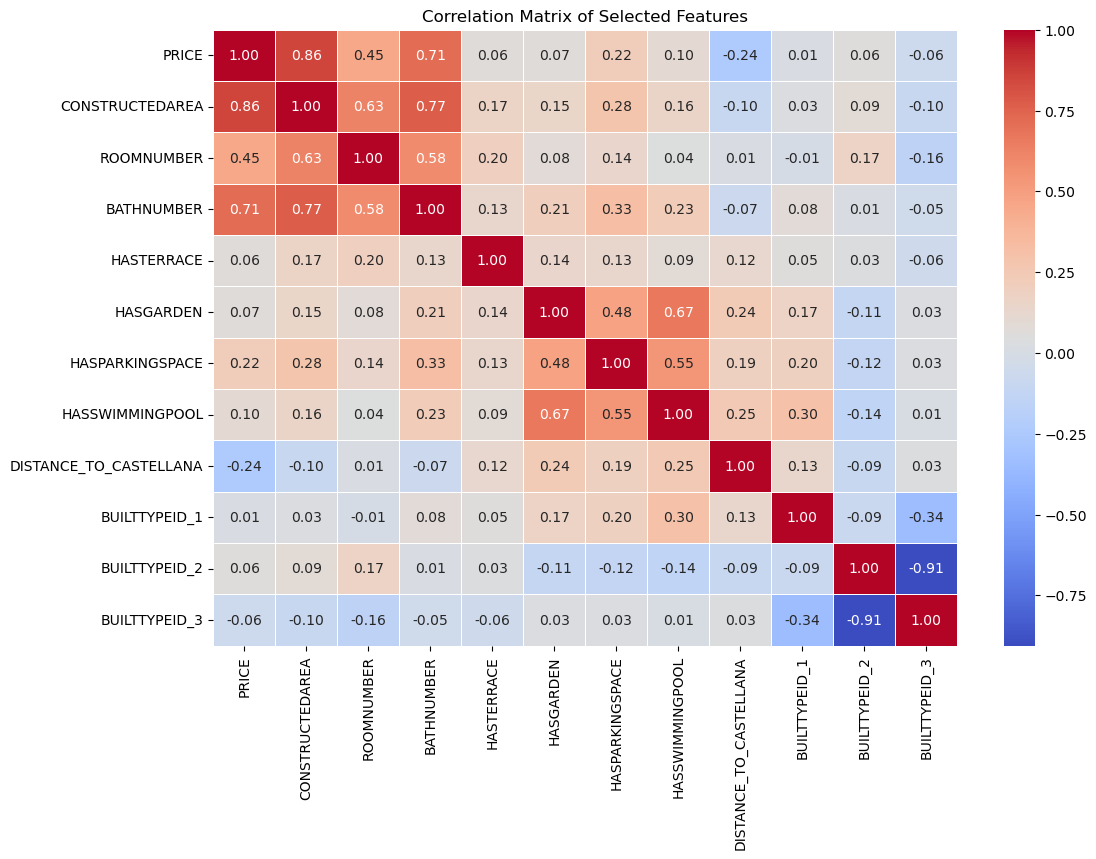

In [68]:
numeric_columns = ['PRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASGARDEN', 'HASPARKINGSPACE', 'HASSWIMMINGPOOL',
                   'DISTANCE_TO_CASTELLANA', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3' ]
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Selected Features")
plt.show()

#### House Price Distribution

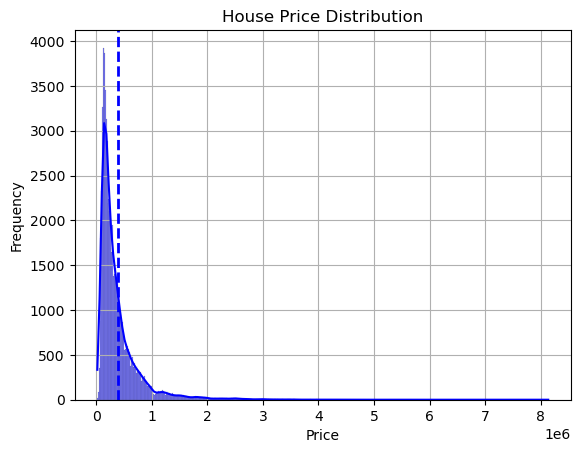

In [58]:
sns.histplot(data['PRICE'], kde=True, color='blue')


plt.axvline(x=data['PRICE'].mean(), color='blue', linestyle='--', linewidth=2)

plt.title('House Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

#### Checking Mean, Median, Maximum & Minimum House Rents

In [59]:
print("Mean House Rent:", round(data["PRICE"].mean()))

print("Median House Rent:", round(data["PRICE"].median()))

print("Highest House Rent:", round(data["PRICE"].max()))

print("Lowest House Rent:", round(data["PRICE"].min()))

Mean House Rent: 389544
Median House Rent: 257000
Highest House Rent: 8133000
Lowest House Rent: 21000


#### 10 Highest House Rents present in the Dataset

In [60]:
data["PRICE"].sort_values(ascending = False)[:10]

56066    8133000.0
71763    7138000.0
67175    7124000.0
67313    7044000.0
67443    7018000.0
47227    6996000.0
25848    6970000.0
25845    6829000.0
53495    6702000.0
2586     6642000.0
Name: PRICE, dtype: float64

#### 10 Lowest House Rents present in the Dataset

In [61]:
data["PRICE"].sort_values()[:10]

53986    21000.0
29778    24000.0
63690    24000.0
85843    24000.0
78538    25000.0
29919    26000.0
78503    28000.0
86243    29000.0
84222    29000.0
77439    30000.0
Name: PRICE, dtype: float64

#### Constructed Area Distribution

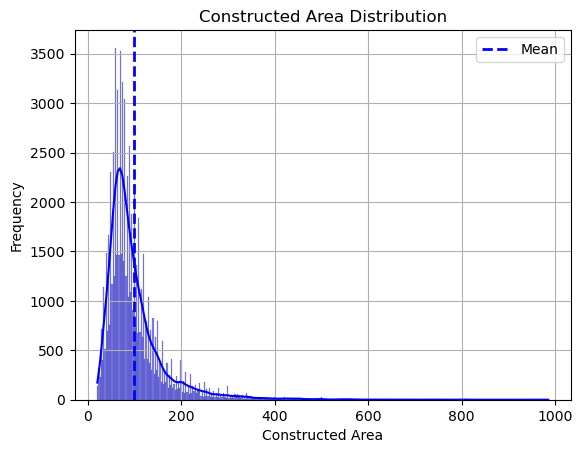

In [62]:
sns.histplot(data['CONSTRUCTEDAREA'], kde=True, color='blue')

plt.axvline(x=data['CONSTRUCTEDAREA'].mean(), color='blue', linestyle='--', linewidth=2, label='Mean')

plt.title('Constructed Area Distribution')
plt.xlabel('Constructed Area')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.show()


#### Checking Mean, Median, Maximum & Minimum Constructed Area

In [63]:
print("Mean Constructed Area:", round(data["CONSTRUCTEDAREA"].mean()))

print("Median Constructed Area:", round(data["CONSTRUCTEDAREA"].median()))

print("Highest Constructed Area:", round(data["CONSTRUCTEDAREA"].max()))

print("Lowest Constructed Area:", round(data["CONSTRUCTEDAREA"].min()))

Mean Constructed Area: 100
Median Constructed Area: 82
Highest Constructed Area: 985
Lowest Constructed Area: 21


#### Distribution of Different Number of Rooms Available

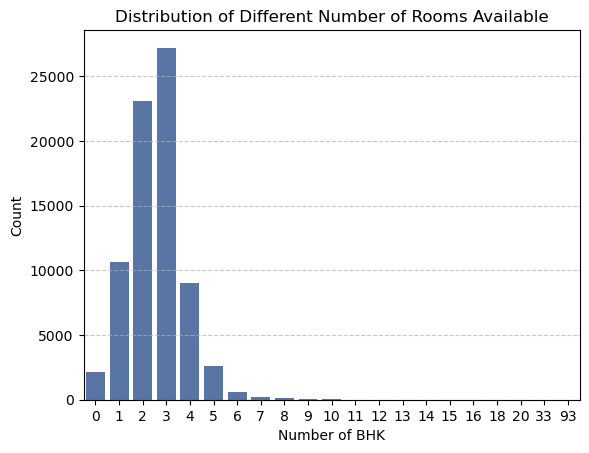

In [64]:
bhk_counts = data['ROOMNUMBER'].value_counts().sort_index()


sns.barplot(x=bhk_counts.index, y=bhk_counts.values, color='#4c72b0')


plt.title('Distribution of Different Number of Rooms Available')
plt.xlabel('Number of BHK')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Checking Mean, Median, Maximum & Minimum Room Number

In [65]:
print("Mean Room Number:", round(data["ROOMNUMBER"].mean()))

print("Median Room Number:", round(data["ROOMNUMBER"].median()))

print("Highest Room Number:", round(data["ROOMNUMBER"].max()))

print("Lowest Room Number:", round(data["ROOMNUMBER"].min()))

Mean Room Number: 3
Median Room Number: 3
Highest Room Number: 93
Lowest Room Number: 0


#### Distribution of Different Number of Bathrooms Available

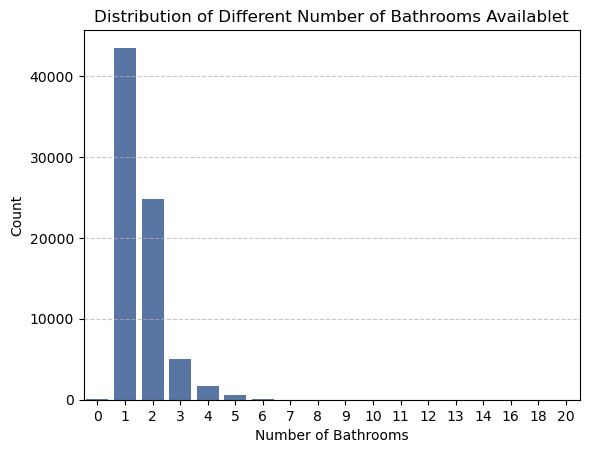

In [66]:
bath_counts = data['BATHNUMBER'].value_counts().sort_index()

sns.barplot(x=bath_counts.index, y=bath_counts.values, color='#4c72b0')

plt.title('Distribution of Different Number of Bathrooms Availablet')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Checking Mean, Median, Maximum & Minimum Bath Number

In [67]:
print("Mean Bath Number:", round(data["BATHNUMBER"].mean()))

print("Median Bath Number:", round(data["BATHNUMBER"].median()))

print("Highest Bath Number:", round(data["BATHNUMBER"].max()))

print("Lowest Bath Number:", round(data["BATHNUMBER"].min()))

Mean Bath Number: 2
Median Bath Number: 1
Highest Bath Number: 20
Lowest Bath Number: 0


#### Proportion of Properties with Key Features

In [70]:
boolean_features = [
    "HASTERRACE", "HASLIFT", "HASAIRCONDITIONING",
    "HASPARKINGSPACE", "HASBOXROOM", "HASWARDROBE",
    "HASSWIMMINGPOOL", "HASDOORMAN", "HASGARDEN"
]

for feature in boolean_features:
    proportion = data[feature].mean() * 100
    print(f"{feature}: {proportion:.2f}% ")

HASTERRACE: 35.02% 
HASLIFT: 68.93% 
HASAIRCONDITIONING: 43.87% 
HASPARKINGSPACE: 21.76% 
HASBOXROOM: 25.00% 
HASWARDROBE: 56.37% 
HASSWIMMINGPOOL: 14.21% 
HASDOORMAN: 24.83% 
HASGARDEN: 17.67% 


#### Number of Properties with each Anemnity

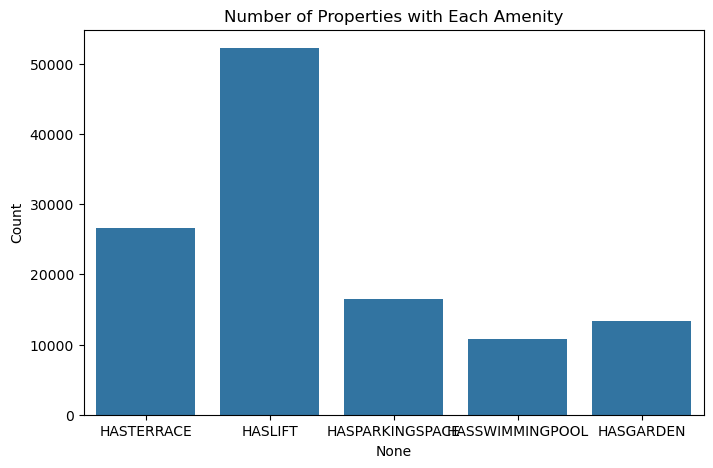

In [71]:
amenities = ['HASTERRACE', 'HASLIFT', 'HASPARKINGSPACE', 'HASSWIMMINGPOOL', 'HASGARDEN']
amenity_counts = data[amenities].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=amenity_counts.index, y=amenity_counts.values)
plt.title('Number of Properties with Each Amenity')
plt.ylabel('Count')
plt.show()

#### Distribution of Built Types: 
1. New construction.
2. Second hand to be restored.
3. Second hand in good condition.

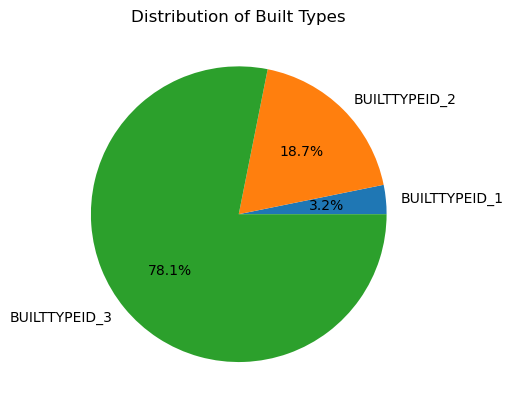

In [72]:
type_counts = data[['BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3']].sum()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Built Types')
plt.show()

#### Price vs. Square Meters Scatter Plot

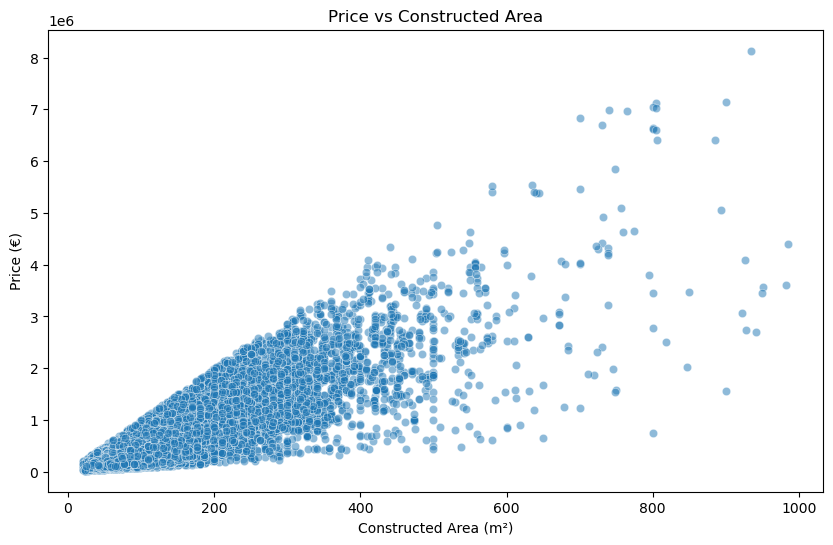

In [73]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='CONSTRUCTEDAREA', y='PRICE', data=data, alpha=0.5)
plt.title('Price vs Constructed Area')
plt.xlabel('Constructed Area (m²)')
plt.ylabel('Price (€)')
plt.show()

#### Price vs Distance to City Center

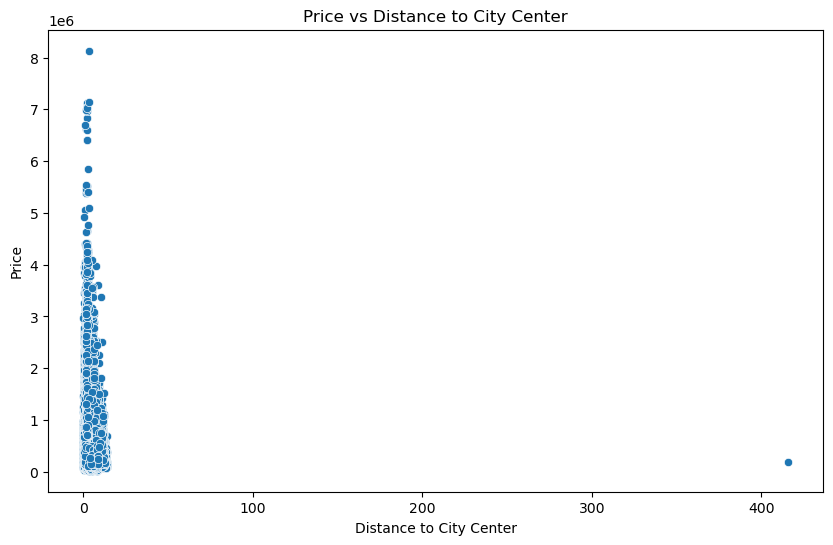

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['DISTANCE_TO_CITY_CENTER'], y=data['PRICE'])
plt.title('Price vs Distance to City Center')
plt.xlabel('Distance to City Center')
plt.ylabel('Price')
plt.show()

#### Geospatial Visualization of Madrid Districts

In [75]:
gdf_districts = gpd.read_file(r'C:\Users\marin\Downloads\madrid-districts.geojson')

gdf_districts.set_crs('EPSG:4326', inplace=True)

madrid_center = [40.4168, -3.7038]
m = folium.Map(location=madrid_center, zoom_start=12, tiles="CartoDB positron")

fill_color = "darkblue"

for _, district in gdf_districts.iterrows():
    district_name = district['name']
    district_geometry = district['geometry']

    folium.GeoJson(
        district_geometry,
        name=district_name,
        style_function=lambda x, color=fill_color: {
            'fillColor': color,
            'color': color,
            'weight': 2,
            'fillOpacity': 0.2
        },
        tooltip=district_name.upper()  
    ).add_to(m)
m

#### Top 100 Most Expensive and Cheapest Rentals in Madrid by District

In [76]:
gdf_districts = gpd.read_file(r'C:\Users\marin\Downloads\madrid-districts.geojson')
gdf_districts.set_crs('EPSG:4326', inplace=True)
top_expensive = data.sort_values(by='PRICE', ascending=False).head(100)

# Ordenar por precio ascendente y tomar las 100 más baratas
top_cheap = data.sort_values(by='PRICE', ascending=True).head(100)

madrid_center = [40.4168, -3.7038]
m = folium.Map(location=madrid_center, zoom_start=12, tiles="CartoDB positron")

fill_color = "darkblue"

for _, district in gdf_districts.iterrows():
    district_name = district['name']
    district_geometry = district['geometry']

    folium.GeoJson(
        district_geometry,
        name=district_name,
        style_function=lambda x, color=fill_color: {
            'fillColor': color,
            'color': color,
            'weight': 2,
            'fillOpacity': 0.2
        },
        tooltip=district_name.upper()  
    ).add_to(m)

# Mostrar propiedades más caras (azul)
for _, row in top_expensive.iterrows():
    folium.Marker(
        location=[row["LATITUDE"], row["LONGITUDE"]],
        icon=folium.Icon(color="blue", icon=""),  
        popup=f"Price: {row['PRICE']}"
    ).add_to(m)

# Propiedades más baratas (verde)
for _, row in top_cheap.iterrows():
    folium.Marker(
        location=[row["LATITUDE"], row["LONGITUDE"]],
        icon=folium.Icon(color="green", icon=""), 
        popup=f"Price: {row['PRICE']}"
    ).add_to(m)
from branca.element import Template, MacroElement

legend_html = """
{% macro html(this, kwargs) %}
<div style="
    position: fixed; 
    bottom: 50px; left: 50px; 
    width: 200px; 
    background-color: white; 
    border: 2px solid grey; 
    z-index: 9999; 
    font-size: 14px;
    padding: 10px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
    word-wrap: break-word;
    overflow-wrap: break-word;
">
    <strong>Legend</strong><br>
    <i class="fa fa-map-marker fa-lg" style="color:blue"></i> Top 100 most expensive<br>
    <i class="fa fa-map-marker fa-lg" style="color:green"></i> Top 100 cheapest
</div>
{% endmacro %}
"""

legend = MacroElement()
legend._template = Template(legend_html)
m.get_root().add_child(legend)
m

#### Summary Statistics of House Prices by District

In [78]:
stats_distritos = data.groupby("DISTRICT")["PRICE"].agg(['count', 'mean', 'min', 'max']).sort_values("mean", ascending=False)
print(stats_distritos)

                     count           mean      min        max
DISTRICT                                                     
Salamanca             6526  711931.964450  58000.0  6996000.0
Chamberi              4696  694110.306644  60000.0  7124000.0
Chamartin             3785  641058.388375  69000.0  8133000.0
Retiro                3257  597155.357691  68000.0  6630000.0
Moncloa-Aravaca       3012  553945.883134  54000.0  3700000.0
Centro                9304  479046.216681  33000.0  5054000.0
Hortaleza             2690  395729.739777  46000.0  3044000.0
Fuencarral-El Pardo   2704  384752.588757  39000.0  3977000.0
Tetuan                4517  357982.731902  24000.0  4098000.0
Barajas                837  357004.778973  72000.0  1804000.0
Arganzuela            3992  328386.773547  41000.0  3452000.0
Ciudad Lineal         4477  285602.635694  36000.0  2781000.0
San Blas              2765  221989.511754  39000.0  1282000.0
Moratalaz              974  210824.435318  52000.0   912000.0
Villa de

#### Number of houses in each district available for rent

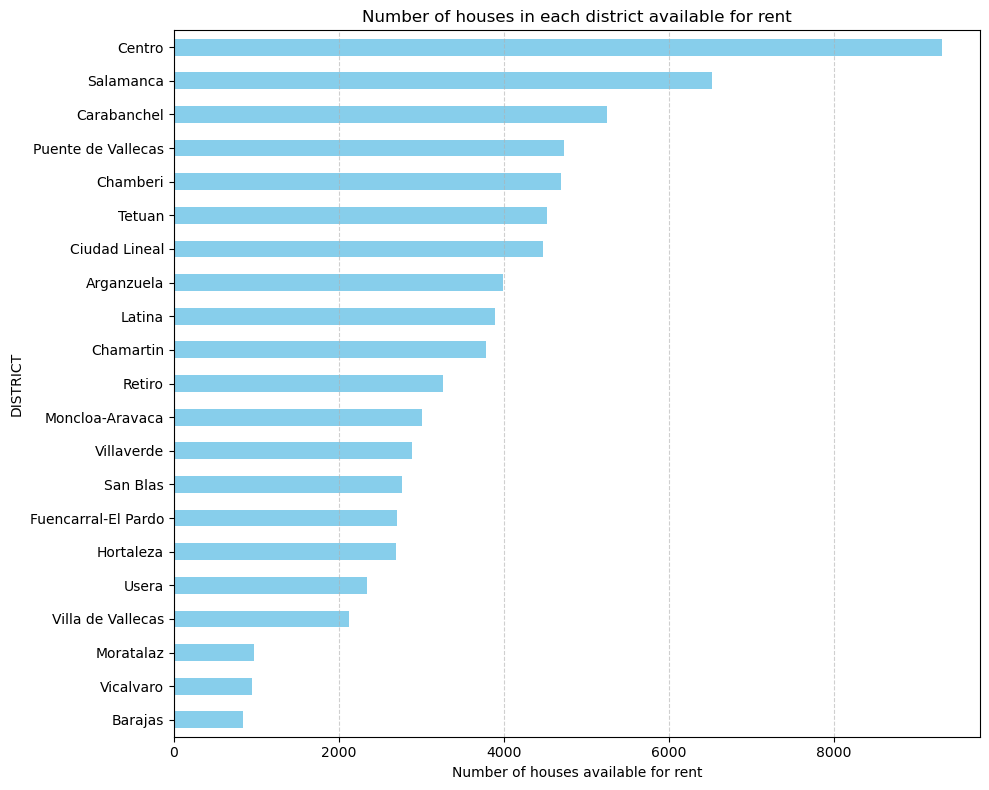

In [79]:
counts_distritos = data['DISTRICT'].value_counts().sort_values()

counts_distritos.plot(kind='barh', figsize=(10, 8), color='skyblue')

plt.xlabel("Number of houses available for rent")
plt.title("Number of houses in each district available for rent")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Average Price by District

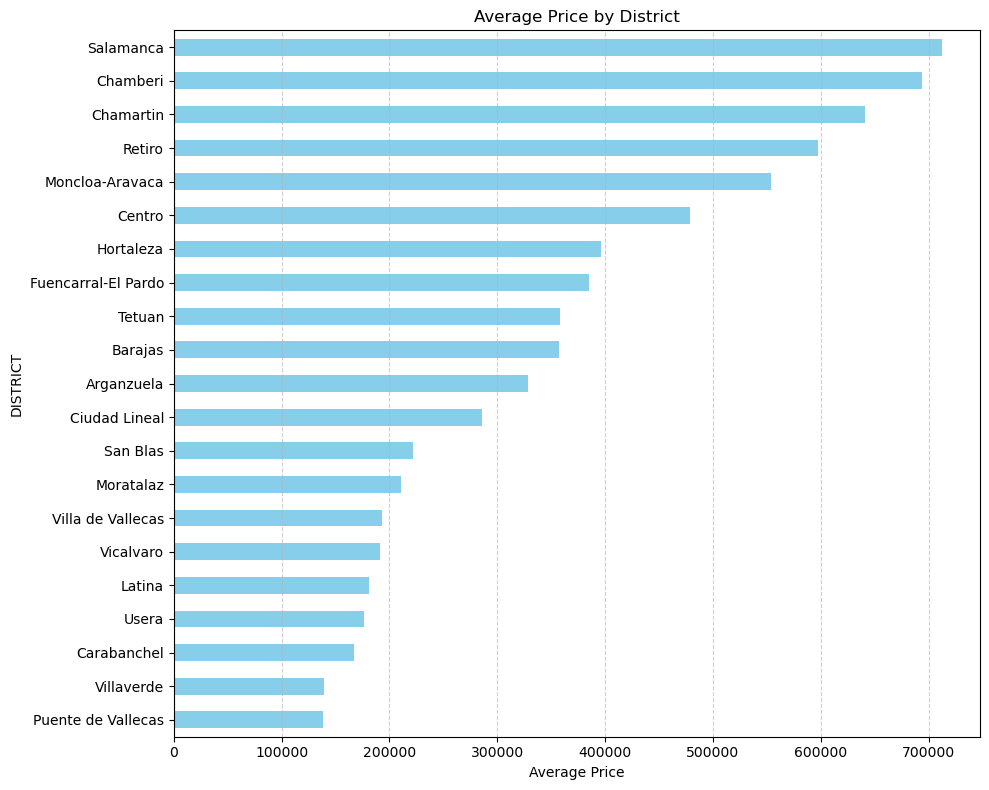

In [80]:
stats_distritos['mean'].sort_values().plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.xlabel("Average Price")
plt.title("Average Price by District")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()